# Scenario 2: Chronic Kidney Disease Prediction
The dataset is taken over 2-month period in India. It has 400 rows with 26 features like red blood cells,
pedal edema, sugar, etc.
## Problem Statement:
    Your aim is to classify whether a patient has chronic kidney disease or not.
## Dataset Description:
    The dataset contains 26 features:
    age - age
    bp - blood pressure
    sg - speciÞc gravity
    al - albumin
    su - sugar
    rbc - red blood cells
    pc - pus cell
    pcc - pus cell clumps
    ba - bacteria
    bgr - blood glucose random
    bu - blood urea
    sc - serum creatinine
    sod - sodium
    pot - potassium
    hemo - hemoglobin
    pcv - packed cell volume
    wc - white blood cell count
    rc - red blood cell count
    htn - hypertension
    dm - diabetes mellitus
    cad - coronary artery disease
    appet - appetite
    pe - pedal edema
    ane - anemia
    class - class
### Tasks to be performed:
1. Load the data, check its shape and check for null values, check unique values for categorical feature, Convert features into appropriate data type - Beginner
2. Convert categorical to numerical feature using Label Encoder - Intermediate
3. Plot and analyze Correlation - Beginner
4. Split the dataset for training and testing - Beginner
1. Perform Grid Search cross validation also perform prediction using the best model -Intermediate
2. Evaluate the model using classiÞcation report and confusion matrix - Beginner
### Topics Covered:
       Data collection
       Data analysis
       Data wrangling/Feature engineering
       Train/Test Algorithms
       Perform Grid Search Cross Validation
       Predicting using the trained model
       Evaluating a model: Confusion matrix and Classification Report

## Question-1: Load and analyze the data
### Tasks to do:
    Load the data in a pandas DataFrame
    Have a look at the first five rows
    Check if the dataset contains any null values
    Check the shape of the dataset
    Check the unique values of the categorical columns
    Check the data-types of all the columns
    Convert features to appropriate data-types

In [8]:
import pandas as pd
data = pd.read_csv('kidney_disease.csv')
data.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [9]:
data.shape

(400, 26)

In [10]:
from pandas_profiling import ProfileReport
profileReport = ProfileReport(data,title ="Chronic Kidney Disease Analysis")
profileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [12]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [13]:
data.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [14]:
clean_df = data.dropna()

In [15]:
clean_df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [16]:
clean_df.shape

(158, 26)

In [19]:
clean_df['pcv']=clean_df['pcv'].astype(float)
clean_df['wc'] = clean_df['wc'].astype(float)
clean_df['rc'] = clean_df['rc'].astype(float)

C:\Users\jack\AppData\Local\Temp/ipykernel_10452/3027934286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['pcv']=clean_df['pcv'].astype(float)
C:\Users\jack\AppData\Local\Temp/ipykernel_10452/3027934286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['wc'] = clean_df['wc'].astype(float)
C:\Users\jack\AppData\Local\Temp/ipykernel_10452/3027934286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    float64
 17  wc              158 non-null    flo

## Question-2: We cannot use string objects for prediction, so convert the categorical feature to numerical values
### Tasks to do:
    Convert all the categorical features to numerical values using Label Encoder from sklearn

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in clean_df.columns:
    if clean_df[i].dtype=='object':
        clean_df[i]=le.fit_transform(clean_df[i])
clean_df.head()

C:\Users\jack\AppData\Local\Temp/ipykernel_10452/1262993960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df[i]=le.fit_transform(clean_df[i])


id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...   pcv       wc  \
3    3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...  32.0   6700.0   
9    9  53.0  90.0  1.020  2.0  0.0    0   0    1   0  ...  29.0  12100.0   
11  11  63.0  70.0  1.010  3.0  0.0    0   0    1   0  ...  32.0   4500.0   
14  14  68.0  80.0  1.010  3.0  2.0    1   0    1   1  ...  16.0  11000.0   
20  20  61.0  80.0  1.015  2.0  0.0    0   0    0   0  ...  24.0   9200.0   

     rc  htn  dm  cad  appet  pe  ane  classification  
3   3.9    1   0    0      1   1    1               0  
9   3.7    1   1    0      1   0    1               0  
11  3.8    1   1    0      1   1    0               0  
14  2.6    1   1    1      1   1    0               0  
20  3.2    1   1    1      1   1    1               0  

[5 rows x 26 columns]

## Question-3: Plot the correlation and tell which feature will help the most while prediction
### Tasks to do:
    Calculate correlation
    Plot the correlation
    Compare the correlation

<AxesSubplot:>

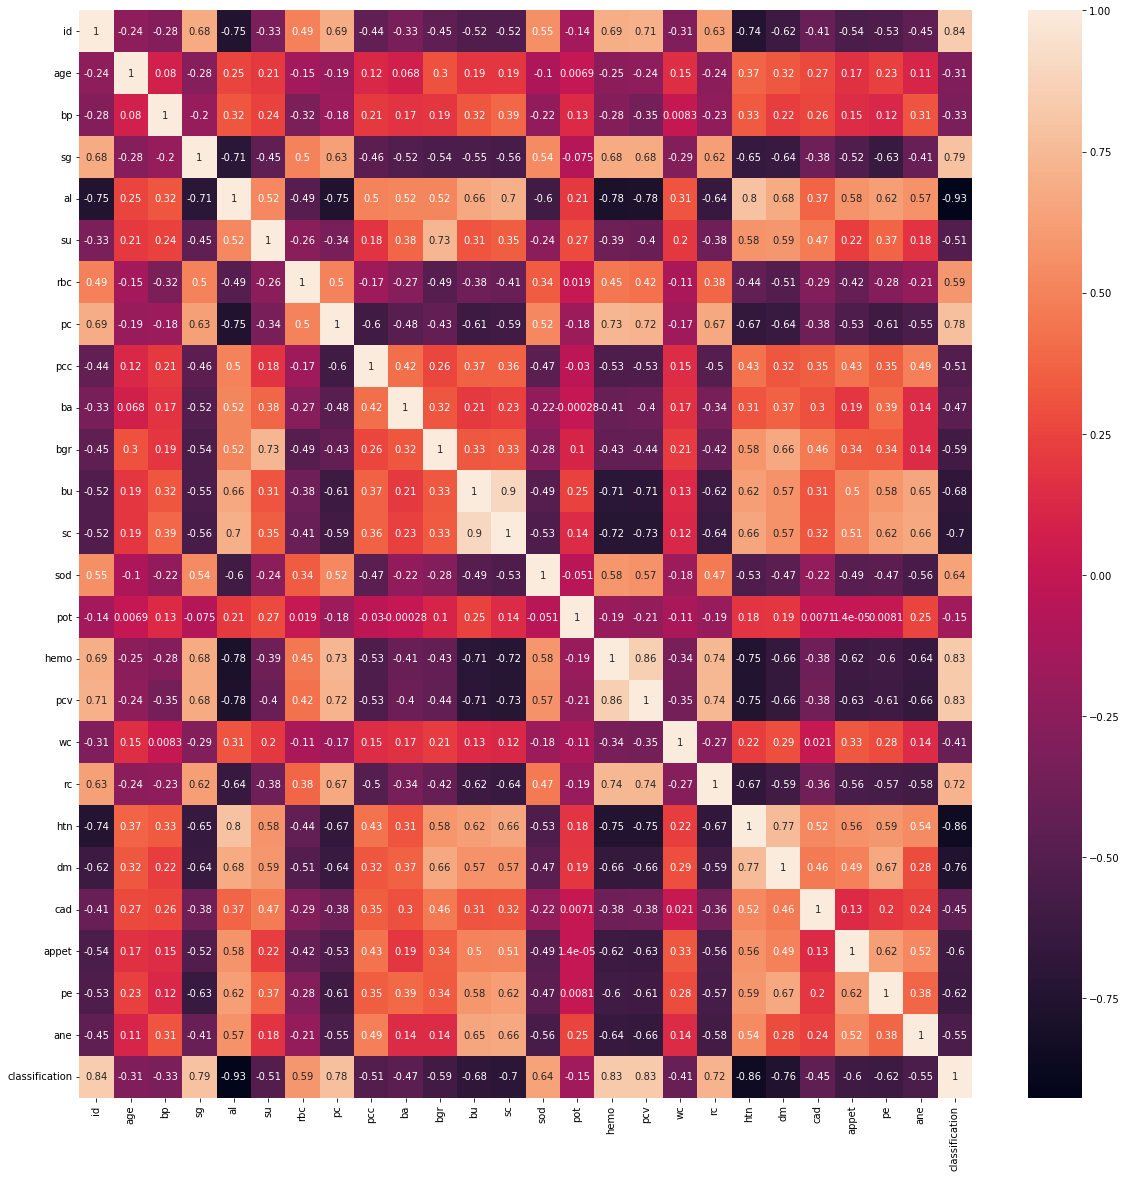

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
correlation = clean_df.corr()
sns.heatmap(correlation,annot=True,ax=ax)

We can see each of the 25 independent features are showing quite good correlation with the target
variable

## Question-4: Split the data into training and testing datasets
### Tasks to do:
    Split the dataset using sklearn, with 30% for testing with random_state=1

In [23]:
from sklearn.model_selection import train_test_split
X= clean_df.drop(columns=['classification'],axis=1)
y= clean_df['classification']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.30,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 25)
(48, 25)
(110,)
(48,)


## Question-5: Perform Grid Search cross validation to find the best parameters for Decision Tree Classifier
### Tasks to do:
    Perform Grid Search CV on random forest classifier to find the best number of:
         maximum depth for the trees, between 3 and 25
         maximum features to be used, between range 4 and 22
    Cross validate the model with 5 folds
    Check the best score and best estimator found by cross validation
    Perform prediction using the model found in cross validation

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=7)
model_params = {'criterion':['gini', 'entropy'], 'max_depth':range(3,25), 'max_features':range(4,22)}
model_cv = GridSearchCV(model,model_params,cv=5,n_jobs=-1,verbose=True)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 25),
                         'max_features': range(4, 22)},
             verbose=True)

In [26]:
model_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=4, random_state=7)

In [27]:
model_cv.best_score_

0.990909090909091

In [28]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 4}

In [29]:
y_pred=model_cv.predict(X_test)

## Question-6: Evaluate the model
### Tasks to do:
    Evaluate the model using confusion matrix
    Evaluate the model using classification report

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

